# **Import and View File**

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
#upload file
df = pd.read_excel('/content/Online Retail.xlsx')


In [ ]:
#row count
row_count = df.shape[0]
print(f"Number of rows: {row_count}")

Number of rows: 541909


In [ ]:
#first few rows
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
#Check Datatype
df.dtypes


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


# **Clean Dataset**

In [ ]:
#check for duplicates
df.shape
duplicate_rows_df = df[df.duplicated()]
print(duplicates.sort_values(list(df.columns)))
print("number of duplicate rows: ", duplicate_rows_df.shape)

       InvoiceNo StockCode                          Description  Quantity  \
494       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
485       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
539       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
...          ...       ...                                  ...       ...   
440149   C574510     22360      GLASS JAR ENGLISH CONFECTIONERY        -1   
461407   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
461408   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
529980   C580764     22667                RECIPE BOX RETROSPOT        -12   
529981   C580764     22667                RECIPE BOX RETROSPOT        -12   

               InvoiceDate  UnitPrice  CustomerID         Country  
494    

In [ ]:
#drop duplicates
df = df.drop_duplicates()
df.count()


,0
InvoiceNo,536641
StockCode,536641
Description,535187
Quantity,536641
InvoiceDate,536641
UnitPrice,536641
CustomerID,401604
Country,536641


In [ ]:
#check for nulls
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


Description and CustomerID nulls will not affect the analysis, will not drop the rows.

In [ ]:
#recheck row count after cleaning
row_count = df.shape[0]
print(f"Number of rows: {row_count}")

Number of rows: 536641


In [ ]:
# Convert to datetime and sort
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.sort_values('InvoiceDate')

# Set Date as index (for time-based operations)
df.set_index('InvoiceDate', inplace=True)
#move up to cleaning


# **Descriptive Statistics**

In [ ]:
#Unit Price and Quantity Stats

# Select numeric columns and drop 'CustomerID'
numeric_df = df.select_dtypes(include='number').drop(columns=['CustomerID'])

#Descriptive Statistics
print("Descriptive Statistics:\n")
print(tabulate(numeric_df.describe().T, headers='keys', tablefmt='pretty'))

# Central tendency
mean = numeric_df.mean()
median = numeric_df.median()
mode = numeric_df.mode().iloc[0]  # Take the first mode if multiple

# Dispersion
data_range = numeric_df.max() - numeric_df.min()
variance = numeric_df.var()
standard_deviation = numeric_df.std()
iqr = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)


stats_df = pd.DataFrame({
    'Median': median,
    'Mode': mode,
    'Range': data_range,
    'Variance': variance,
    'Std Dev': standard_deviation,
    'IQR': iqr
})

print("\nSummary Statistics:\n")
print(tabulate(stats_df, headers='keys', tablefmt='pretty', floatfmt=".2f"))


Descriptive Statistics:

+-----------+----------+-------------------+--------------------+-----------+------+------+------+---------+
|           |  count   |       mean        |        std         |    min    | 25%  | 50%  | 75%  |   max   |
+-----------+----------+-------------------+--------------------+-----------+------+------+------+---------+
| Quantity  | 536641.0 | 9.620029032444409 | 219.13015613097335 | -80995.0  | 1.0  | 3.0  | 10.0 | 80995.0 |
| UnitPrice | 536641.0 | 4.632655674836622 | 97.23311763773249  | -11062.06 | 1.25 | 2.08 | 4.13 | 38970.0 |
+-----------+----------+-------------------+--------------------+-----------+------+------+------+---------+

Summary Statistics:

+-----------+--------+------+----------+-------------------+--------------------+------+
|           | Median | Mode |  Range   |     Variance      |      Std Dev       | IQR  |
+-----------+--------+------+----------+-------------------+--------------------+------+
| Quantity  |  3.0   | 1.0  | 16

## **Product Analysis: Quantity and Sales**

Top 10 Products by Quantity Sold:
                       Description  TotalQuantity
 WORLD WAR 2 GLIDERS ASSTD DESIGNS          53751
           JUMBO BAG RED RETROSPOT          47260
                    POPCORN HOLDER          36322
     ASSORTED COLOUR BIRD ORNAMENT          36282
   PACK OF 72 RETROSPOT CAKE CASES          36016
WHITE HANGING HEART T-LIGHT HOLDER          35006
                RABBIT NIGHT LIGHT          30631
           MINI PAINT SET VINTAGE           26437
        PACK OF 12 LONDON TISSUES           26299
PACK OF 60 PINK PAISLEY CAKE CASES          24719

Top 10 Products by Revenue:
                       Description  TotalRevenue
                    DOTCOM POSTAGE     206245.48
          REGENCY CAKESTAND 3 TIER     164459.49
                     PARTY BUNTING      98243.88
WHITE HANGING HEART T-LIGHT HOLDER      97659.94
           JUMBO BAG RED RETROSPOT      92175.79
                RABBIT NIGHT LIGHT      66661.63
                           POSTAGE      6623

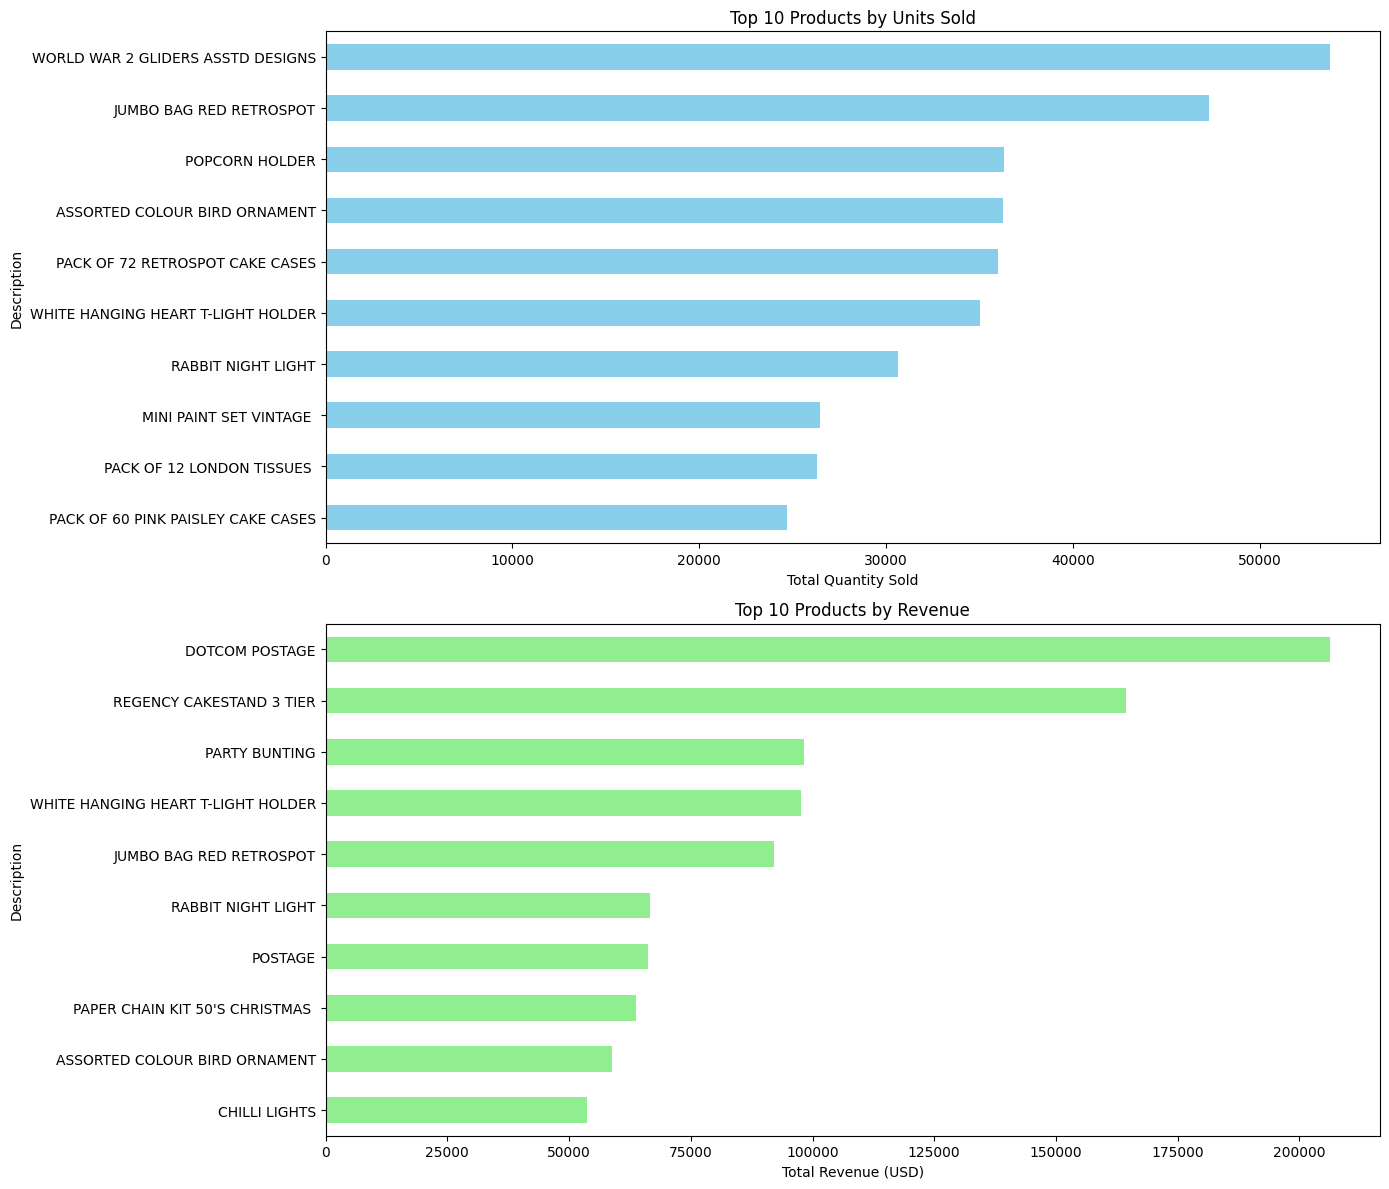


Key Statistics:
Total Products: 4,792
Average Quantity per Product: 1080.2
Average Revenue per Product: $2,029.63


In [ ]:
# Top 10 best-selling items by quantity and revenue

# Calculate total revenue per transaction line
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

# Group by product and aggregate metrics
product_analysis = df.groupby(['StockCode', 'Description']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('TotalRevenue', 'sum')
).reset_index()

# Top 10 by Quantity Sold
top10_quantity = product_analysis.nlargest(10, 'TotalQuantity')[['Description', 'TotalQuantity']]
print("Top 10 Products by Quantity Sold:")
print(top10_quantity.to_string(index=False))

# Top 10 by Revenue Generated
top10_revenue = product_analysis.nlargest(10, 'TotalRevenue')[['Description', 'TotalRevenue']]
print("\nTop 10 Products by Revenue:")
print(top10_revenue.to_string(index=False))

# Combined Analysis (Products in Both Top 10s)
combined_top = product_analysis[
    product_analysis['Description'].isin(top10_quantity['Description']) &
    product_analysis['Description'].isin(top10_revenue['Description'])
]
print("\nProducts Appearing in Both Top 10 Lists:")
print(combined_top[['Description', 'TotalQuantity', 'TotalRevenue']].to_string(index=False))


import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Quantity Chart
top10_quantity.plot(kind='barh', y='TotalQuantity', x='Description',
                    ax=ax[0], title='Top 10 Products by Units Sold',
                    legend=False, color='skyblue')
ax[0].set_xlabel('Total Quantity Sold')
ax[0].invert_yaxis()

# Revenue Chart
top10_revenue.plot(kind='barh', y='TotalRevenue', x='Description',
                   ax=ax[1], title='Top 10 Products by Revenue',
                   legend=False, color='lightgreen')
ax[1].set_xlabel('Total Revenue (USD)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Additional
print("\nKey Statistics:")
print(f"Total Products: {len(product_analysis):,}")
print(f"Average Quantity per Product: {product_analysis['TotalQuantity'].mean():.1f}")
print(f"Average Revenue per Product: ${product_analysis['TotalRevenue'].mean():,.2f}")


In [ ]:
# Check for negative quantities/prices- Total returned items
print("\nData Quality Checks:")
print("Negative Quantities:", df[df['Quantity'] < 0].shape[0])
print("Zero/Null Prices:", df[(df['UnitPrice'] <= 0) | df['UnitPrice'].isnull()].shape[0])



Data Quality Checks:
Negative Quantities: 10587
Zero/Null Prices: 2512


# **Country Analysis**

In [ ]:
# List and number of countries in dataset
unique_countries = df['Country'].unique()
print("List of unique countries:")
print(unique_countries)
print(f"Number of unique countries in the dataset: {unique_countries.shape[0]}")

List of unique countries:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
Number of unique countries in the dataset: 38


In [ ]:
# Calculate revenue and total quantity
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Aggregate country stats
country_stats = df.groupby('Country').agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalRevenue=('Revenue', 'sum')
).reset_index().sort_values('TotalQuantity', ascending=False)

# Add percentage contribution
total_revenue = country_stats['TotalRevenue'].sum()
country_stats['Rev %'] = (country_stats['TotalRevenue'] / total_revenue * 100).round(1)


print("\nTop Countries by Quantity Sold with Revenue and Percentage Contributions:")
print(tabulate(
    country_stats.head(10)[['Country', 'TotalQuantity', 'TotalRevenue', 'Rev %']],
    headers=['Country', 'Quantity','Revenue', 'Rev %'],
    tablefmt='pretty',
    numalign="right",
    floatfmt=(",.0f", ".1f", ",.0f", ".1f"),
    showindex=False
))


Top Countries by Quantity Sold with Revenue and Percentage Contributions:
+----------------+----------+-------------+-------+
|    Country     | Quantity |   Revenue   | Rev % |
+----------------+----------+-------------+-------+
| United Kingdom | 4250328  | 8167128.184 | 84.0  |
|  Netherlands   |  200128  |  284661.54  |  2.9  |
|      EIRE      |  142495  |  262993.38  |  2.7  |
|    Germany     |  117341  |  221509.47  |  2.3  |
|     France     |  110438  |  197317.11  |  2.0  |
|   Australia    |  83643   |  137009.77  |  1.4  |
|     Sweden     |  35632   |  36585.41   |  0.4  |
|  Switzerland   |  30313   |  56363.05   |  0.6  |
|     Spain      |  26817   |  54756.03   |  0.6  |
|     Japan      |  25218   |  35340.62   |  0.4  |
+----------------+----------+-------------+-------+


In [ ]:
# Top product per country

# Collect all top products
all_products = []
for country in country_products['Country'].unique():
    top_product = country_products[country_products['Country'] == country] \
        .nlargest(1, 'CountryQuantity') \
        [['Country', 'Description', 'CountryQuantity', 'CountryRevenue']]
    all_products.append(top_product)

# Combine and number entries starting at 1
combined = pd.concat(all_products).reset_index(drop=True)
combined.insert(0, '#', range(1, len(combined)+1))


print("\nTop Product per Country (Numbered):")
print(tabulate(
    combined,
    headers=['#', 'Country', 'Product', 'Units Sold', 'Revenue'],
    tablefmt='pretty',
    numalign="right",
    floatfmt=",.2f",
    showindex=False
))


Top Product per Country (Numbered):
+----+----------------------+-------------------------------------+------------+--------------------+
| #  |       Country        |               Product               | Units Sold |      Revenue       |
+----+----------------------+-------------------------------------+------------+--------------------+
| 1  |      Australia       |       MINI PAINT SET VINTAGE        |    2916    |       1607.4       |
| 2  |       Austria        |  SET 12 KIDS COLOUR  CHALK STICKS   |    288     | 103.67999999999999 |
| 3  |       Bahrain        |     ICE CREAM SUNDAE LIP GLOSS      |     96     |       120.0        |
| 4  |       Belgium        |   PACK OF 72 RETROSPOT CAKE CASES   |    480     |       248.4        |
| 5  |        Brazil        | SET/3 RED GINGHAM ROSE STORAGE BOX  |     24     |       81.36        |
| 6  |        Canada        |     RETRO COFFEE MUGS ASSORTED      |    504     |       534.24       |
| 7  |   Channel Islands    |             RAI

In [ ]:
# Returned items (negative quantities)
returns = df[df['Quantity'] < 0].groupby('Description')['Quantity'].sum()
print("\nMost Frequently Returned Products:")
print(returns.nsmallest(5).to_string())


Most Frequently Returned Products:
Description
PAPER CRAFT , LITTLE BIRDIE      -80995
MEDIUM CERAMIC TOP STORAGE JAR   -74494
printing smudges/thrown away     -19200
Unsaleable, destroyed.           -15644
check                            -13247


# **DateTime Analysis**

In [ ]:
# Data Preparation
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.sort_values('InvoiceDate').set_index('InvoiceDate')
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Create time analysis columns
df['DayOfWeek'] = df.index.day_name()
df['Hour'] = df.index.hour
df['Date'] = df.index.date  # For daily counts

# Calculate busiest day based on number of transactions
daily_transactions = df.groupby('Date').size()
busiest_day_date = daily_transactions.idxmax()
busiest_day_of_week = busiest_day_date.strftime('%A')

# Calculate busiest hour based on number of transactions
hourly_transactions = df.groupby('Hour').size()
busiest_hour = hourly_transactions.idxmax()

# Sales analysis by day of week
dow_analysis = df.groupby('DayOfWeek').agg(
    Transactions=('Revenue', 'size'),
    Quantity=('Quantity', 'sum'),
    Revenue=('Revenue', 'sum')
).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Sales analysis by hour
hourly_analysis = df.groupby('Hour').agg(
    Transactions=('Revenue', 'size'),
    Quantity=('Quantity', 'sum'),
    Revenue=('Revenue', 'sum')
)

# Print results
print(f"Busiest Day: {busiest_day_of_week} ({busiest_day_date})")
print(f"Busiest Hour: {busiest_hour}:00 - {busiest_hour+1}:00")

print("\nDaily Performance Analysis:")
print(dow_analysis.to_string())

print("\nHourly Performance Analysis:")
print(hourly_analysis.to_string())

# Optional: For transaction heatmap
print("\nTransaction Count by Hour and Day:")
print(pd.crosstab(df['DayOfWeek'], df['Hour'], normalize='columns').round(2))

Busiest Day: Monday (2011-12-05)
Busiest Hour: 12:00 - 13:00

Daily Performance Analysis:
           Transactions   Quantity      Revenue
DayOfWeek                                      
Monday          94435.0   813178.0  1584895.301
Tuesday        101064.0   961133.0  1965703.611
Wednesday       93715.0   967222.0  1730088.430
Thursday       103056.0  1165600.0  2108701.530
Friday          81565.0   793106.0  1537958.621
Saturday            NaN        NaN          NaN
Sunday          62806.0   462263.0   798659.461

Hourly Performance Analysis:
      Transactions  Quantity      Revenue
Hour                                     
6               41       -86     -497.350
7              383     15361    31009.320
8             8906    157715   281723.020
9            34314    429254   766524.171
10           48808    683519  1327329.891
11           56949    635974  1146457.490
12           77573    821059  1357595.120
13           71247    674272  1172985.870
14           66572    569420

In [ ]:
#Step 2: Busiest Days by Quantity & Revenue
# Daily totals
daily_quantity = df['Quantity'].resample('D').sum()
daily_revenue = df['Revenue'].resample('D').sum()

# Top 5 busiest days
top_days_quantity = daily_quantity.nlargest(5)
top_days_revenue = daily_revenue.nlargest(5)

print("Top 5 Days by Quantity Sold:")
print(top_days_quantity.to_string())

print("\nTop 5 Days by Revenue:")
print(top_days_revenue.to_string())

Top 5 Days by Quantity Sold:
InvoiceDate
2011-10-05    46097
2011-11-14    45842
2011-12-05    44038
2011-09-20    43659
2011-10-20    40738

Top 5 Days by Revenue:
InvoiceDate
2011-11-14    111958.62
2011-09-20    109228.08
2011-12-08     81294.33
2011-11-23     78223.52
2011-10-05     75111.57


In [ ]:
# Busiest weeks

# Combine both metrics
top_weeks = pd.DataFrame({
    'Quantity': weekly_quantity,
    'Revenue': weekly_revenue
}).nlargest(5, 'Quantity')

# Format dates
top_weeks.index = top_weeks.index.strftime('%Y-%m-%d')

print("\nTop 5 Weeks by Quantity Sold with Revenue:")
print(top_weeks.to_string())





Top 5 Weeks by Quantity Sold with Revenue:
             Quantity    Revenue
InvoiceDate                     
2011-11-14     194594  387658.74
2011-12-05     166803  321290.50
2011-11-28     166420  313958.10
2011-11-07     162864  308408.74
2011-10-10     158597  281631.89


END

In [ ]:
#export cleaned dataset
from google.colab import files
df.to_csv('Online_Retail_Clean.csv', encoding = 'utf-8-sig')
files.download('Online_Retail_Clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save top products to Excel
with pd.ExcelWriter('product_analysis.xlsx') as writer:
    top10_quantity.to_excel(writer, sheet_name='Top Quantity', index=False)
    top10_revenue.to_excel(writer, sheet_name='Top Revenue', index=False)
    combined_top.to_excel(writer, sheet_name='Top Combined', index=False)


In [ ]:
# Export for Tableau
df.to_csv('cleaned_retail_data.csv', index=False)
product_sales.to_csv('product_sales.csv', index=False)
country_sales.to_csv('country_sales.csv', index=False)